 TASK 1 : **IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
#from utils import *
import sys

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from keras.callbacks import ModelCheckpoint, EarlyStopping


%matplotlib inline
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

print('Libraries Imported')

Libraries Imported


TASK 2 : **IMPORTING THE DATA**

In [2]:
from google.colab import files
uploaded = files.upload()
#To upload from your local drive

KeyboardInterrupt: ignored

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Data_Final.csv')


In [3]:
dataset.drop(['product','quantity_unit'], axis=1)

,Unnamed: 0,category_id,product_id,offer_price,regular_price,one_unit_price,quantity,limited
0,0,8,292,4.80,8.0,0.00,14.0,1
1,1,7,295,9.45,18.9,0.00,3.0,1
2,2,7,298,16.45,32.9,0.00,0.0,1
3,3,7,301,21.45,42.9,0.00,0.0,1
4,4,7,304,21.45,42.9,0.00,0.0,1
...,...,...,...,...,...,...,...,...
2078027,2078027,7,4531,9.95,19.9,9.95,2.0,1
2078028,2078028,7,325,11.45,22.9,11.45,0.0,1
2078029,2078029,7,418,21.95,43.9,21.95,1.0,1
2078030,2078030,7,1270,28.63,40.9,28.63,3.0,1


In [4]:
df = dataset
df

,Unnamed: 0,category_id,product_id,product,offer_price,regular_price,one_unit_price,quantity_unit,quantity,limited
0,0,8,292,Vanilla cake with coconut,4.80,8.0,0.00,pcs,14.0,1
1,1,7,295,"LETTMELK 0,5%",9.45,18.9,0.00,item,3.0,1
2,2,7,298,MANGO STK CEVITA,16.45,32.9,0.00,item,0.0,1
3,3,7,301,OST & SKINKESALAT,21.45,42.9,0.00,item,0.0,1
4,4,7,304,TACOSALAT,21.45,42.9,0.00,item,0.0,1
...,...,...,...,...,...,...,...,...,...,...
2078027,2078027,7,4531,FAMILIEBRØD,9.95,19.9,9.95,item,2.0,1
2078028,2078028,7,325,HELMELK,11.45,22.9,11.45,item,0.0,1
2078029,2078029,7,418,KYLLING KJØTTDEIG,21.95,43.9,21.95,item,1.0,1
2078030,2078030,7,1270,COTTAGE CHEESE,28.63,40.9,28.63,item,3.0,1


In [9]:
X = dataset[['category_id', 'product_id', 'regular_price', 'one_unit_price', 'quantity', 'limited']]
y = dataset['offer_price']
X

,category_id,product_id,regular_price,one_unit_price,quantity,limited
0,8,292,8.0,0.00,14.0,1
1,7,295,18.9,0.00,3.0,1
2,7,298,32.9,0.00,0.0,1
3,7,301,42.9,0.00,0.0,1
4,7,304,42.9,0.00,0.0,1
...,...,...,...,...,...,...
2078027,7,4531,19.9,9.95,2.0,1
2078028,7,325,22.9,11.45,0.0,1
2078029,7,418,43.9,21.95,1.0,1
2078030,7,1270,40.9,28.63,3.0,1


CHECK MISSING DATA : Its  good practice to check if the data has any missing values. 

In [7]:
dataset.isna().sum

<bound method DataFrame.sum of          Unnamed: 0  category_id  product_id  ...  quantity_unit  quantity  limited
0             False        False       False  ...          False     False    False
1             False        False       False  ...          False     False    False
2             False        False       False  ...          False     False    False
3             False        False       False  ...          False     False    False
4             False        False       False  ...          False     False    False
...             ...          ...         ...  ...            ...       ...      ...
2078027       False        False       False  ...          False     False    False
2078028       False        False       False  ...          False     False    False
2078029       False        False       False  ...          False     False    False
2078030       False        False       False  ...          False     False    False
2078031       False        False       False 

TASK 3 : **DATA NORMALIZATION**

In [ ]:
df = df.iloc[:, 1:]
df_norm = (df - df.mean())/df.std()
df_norm.head()


In [7]:
#convert label values
y_mean=df['regular_price'].mean()
y_std=df['regular_price'].std()
def convert_label_value(pred):
  return int(pred*y_std+y_mean)
print(convert_label_value(-1.836255))

-33


TASK 4 : **TRAINING AND TEST SET**

In [20]:
x = df[['category_id', 'product_id', 'regular_price', 'one_unit_price', 'quantity', 'limited']]
#y = dataset['offer_price']
x
x.head()

,category_id,product_id,regular_price,one_unit_price,quantity,limited
0,8,292,8.0,0.0,14.0,1
1,7,295,18.9,0.0,3.0,1
2,7,298,32.9,0.0,0.0,1
3,7,301,42.9,0.0,0.0,1
4,7,304,42.9,0.0,0.0,1


In [21]:
y = dataset['offer_price']
y.head()

0     4.80
1     9.45
2    16.45
3    21.45
4    21.45
Name: offer_price, dtype: float64

In [22]:
#feature and label values
x_arr = x.values
y_arr = y.values
print('feature array shape:',x_arr.shape)
print('label array shape: ',y_arr.shape)

feature array shape: (2078032, 6)
label array shape:  (2078032,)


In [23]:
#train and test split
x_train,x_test,y_train,y_test = train_test_split(x_arr,y_arr,test_size=0.05,random_state=0)
print('Training Set: ',x_train.shape,y_train.shape)
print('Test Set :',x_test.shape,y_test.shape)

Training Set:  (1974130, 6) (1974130,)
Test Set : (103902, 6) (103902,)


In [40]:
# root mean squared error (rmse) for regression
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))

TASK 5 : **CREATE THE MODEL**

In [41]:
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras import metrics
def get_model():
  model=Sequential([Dense(10,input_shape=(6, ),activation = 'relu'),
                    Dense(20,activation='relu'),Dense(1,activation='relu'),Dense(1)])
  model.compile(optimizer="Nadam", loss="mean_squared_error", metrics=["mean_squared_error", rmse, r_square])
  return model
  get_model().summary()

TASK : 6 **MODEL TRAINING**

In [45]:
#es_cb = EarlyStopping(monitor= 'val_loss', patience = 5)
model = get_model()
preds_on_untrained = model.predict(x_test)
#history=model.fit(x_train,y_train,validation_data =(x_test,y_test), epochs = 100, callabacks = [es_cb])
history = model.fit(
        x=x_train,
        y=y_train,
        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)],
        validation_data=(x_test,y_test),
        epochs=5,
        verbose=True)




Epoch 1/5
61692/61692 [==============================] - 209s 3ms/step - loss: 175.6635 - mean_squared_error: 175.6635 - rmse: 4.0932 - r_square: 0.7090 - val_loss: 37.1262 - val_mean_squared_error: 37.1262 - val_rmse: 2.6059 - val_r_square: 0.9303
Epoch 2/5
61692/61692 [==============================] - 208s 3ms/step - loss: 68.1363 - mean_squared_error: 68.1363 - rmse: 2.8996 - r_square: 0.8963 - val_loss: 35.8584 - val_mean_squared_error: 35.8584 - val_rmse: 2.3873 - val_r_square: 0.9336
Epoch 3/5
61692/61692 [==============================] - 209s 3ms/step - loss: 90.5370 - mean_squared_error: 90.5370 - rmse: 2.9270 - r_square: 0.8324 - val_loss: 38.2152 - val_mean_squared_error: 38.2152 - val_rmse: 2.8588 - val_r_square: 0.9269
Epoch 4/5
61692/61692 [==============================] - 208s 3ms/step - loss: 47.3740 - mean_squared_error: 47.3740 - rmse: 2.8232 - r_square: 0.9171 - val_loss: 35.0308 - val_mean_squared_error: 35.0308 - val_rmse: 2.6653 - val_r_square: 0.9348
Epoch 5/5


In [49]:
x_test

AttributeError: ignored

In [54]:
# get predictions
y_pred = model.predict(x_test)
score = model.evaluate(x_test, y_test)

3247/3247 [==============================] - 6s 2ms/step - loss: 36.8172 - mean_squared_error: 36.8172 - rmse: 2.5953 - r_square: 0.9303


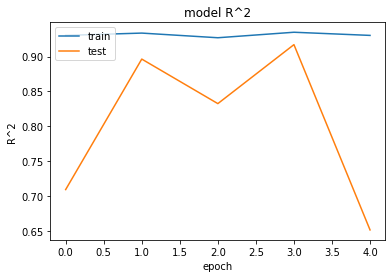

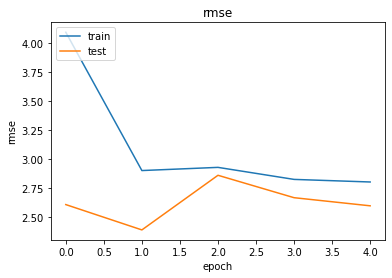

In [51]:

#-----------------------------------------------------------------------------
# Plot learning curves including R^2 and RMSE
#-----------------------------------------------------------------------------

# plot training curve for R^2 (beware of scale, starts very low negative)
plt.plot(history.history['val_r_square'])
plt.plot(history.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
           
# plot training curve for rmse
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

KeyError: ignored

**PLOT RAW PREDICTIONS**


In [29]:
preds_on_trained = model.predict(x_test)
compare_predictions(preds_on_untrained,preds_on_trained,y_test)

NameError: ignored

In [ ]:
price_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_trained=[convert_label_value(y) for y in preds_on_trained]
price_test = [convert_label_value(y) for y in y_test]
compare_predictions(price_untrained,price_trained,price_test)